In [2]:
import pandas as pd


In [4]:
df1 = pd.read_csv("Data01.csv")
print(df1.shape)
df1.head()

(15000, 7)


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [18]:
df1.info()  # 날짜 데이터 처리하자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           15000 non-null  object        
 1   상품명          15000 non-null  object        
 2   바코드          14992 non-null  float64       
 3   발주가능상태       15000 non-null  object        
 4   입고수량         15000 non-null  int64         
 5   카테고리         15000 non-null  object        
 6   출고수량         15000 non-null  int64         
 7   날짜_datetime  15000 non-null  datetime64[ns]
 8   연도           15000 non-null  int64         
 9   주차           15000 non-null  int64         
 10  일자           15000 non-null  int64         
 11  요일           15000 non-null  object        
 12  월            15000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 1.5+ MB


In [6]:
df1['날짜'] # 시리즈(순열) 형태, dtype: object 문자로 인식

0        2019-05-16
1        2019-05-16
2        2019-05-16
3        2019-05-16
4        2019-05-16
            ...    
14995    2019-08-07
14996    2019-08-07
14997    2019-08-07
14998    2019-08-07
14999    2019-08-07
Name: 날짜, Length: 15000, dtype: object

In [7]:
pd.to_datetime(df1['날짜']) # 날짜 처럼 보이는 문자형식 시리즈를 datetime으로 변경

0       2019-05-16
1       2019-05-16
2       2019-05-16
3       2019-05-16
4       2019-05-16
           ...    
14995   2019-08-07
14996   2019-08-07
14997   2019-08-07
14998   2019-08-07
14999   2019-08-07
Name: 날짜, Length: 15000, dtype: datetime64[ns]

In [8]:
df1['날짜_datetime'] = pd.to_datetime(df1['날짜']) # 새로운 컬럼으로 선언
df1.head(2)

In [10]:
df1['연도'] = df1['날짜_datetime'].dt.year    # 날짜데이터 형식일때 연도를 추출하여 연도 컬럼 신규 할당
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019


In [11]:
pd.pivot_table(data=df1, index = '연도', values = '출고수량', aggfunc='sum')

,출고수량
연도,
2019,108078


In [15]:
df1['월'] = df1['날짜_datetime'].dt.month
df1['주차'] = df1['날짜_datetime'].dt.week
df1['일자'] = df1['날짜_datetime'].dt.day
df1['요일'] = df1['날짜_datetime'].dt.day_name()    # 요일
df1.head(2)


/var/folders/gc/6m7mlkwj64qfcj4xf8ljtwz40000gn/T/ipykernel_26062/2936571340.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['주차'] = df1['날짜_datetime'].dt.week


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도,주차,일자,요일,월
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,5,20,16,Thursday,5
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,5,20,16,Thursday,5


In [16]:
pd.pivot_table(data=df1, index = '연도', values = '출고수량', aggfunc='sum')

,출고수량
연도,
5,19427
6,39397
7,40584
8,8670


<AxesSubplot:xlabel='연도'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from c

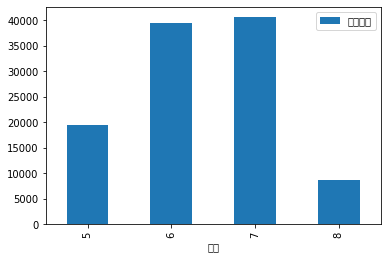

In [19]:
pd.pivot_table(data=df1, index = '연도', values = '출고수량', aggfunc='sum').plot(kind='bar')
